In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [2]:
dataset = pd.read_csv(r"C:\Users\Aamir Shahzad\OneDrive\Desktop\New folder (2)\Data Science\AI_Resume_Screening\AI_Resume_Screening.csv")
dataset.head(5)

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [3]:
dataset.shape

(1000, 11)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
dataset['Certifications'] = dataset['Certifications'].fillna("No Certification")

In [6]:
dataset.head(2)

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,No Certification,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100


In [7]:
dataset.describe()

,Resume_ID,Experience (Years),Salary Expectation ($),Projects Count,AI Score (0-100)
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,4.896000,79994.486000,5.13300,83.950000
std,288.819436,3.112695,23048.472549,3.23137,20.983036
min,1.000000,0.000000,40085.000000,0.00000,15.000000
25%,250.750000,2.000000,60415.750000,2.00000,70.000000
50%,500.500000,5.000000,79834.500000,5.00000,100.000000
75%,750.250000,8.000000,99583.250000,8.00000,100.000000
max,1000.000000,10.000000,119901.000000,10.00000,100.000000


In [8]:
dataset.columns

Index(['Resume_ID', 'Name', 'Skills', 'Experience (Years)', 'Education',
       'Certifications', 'Job Role', 'Recruiter Decision',
       'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)'],
      dtype='object')

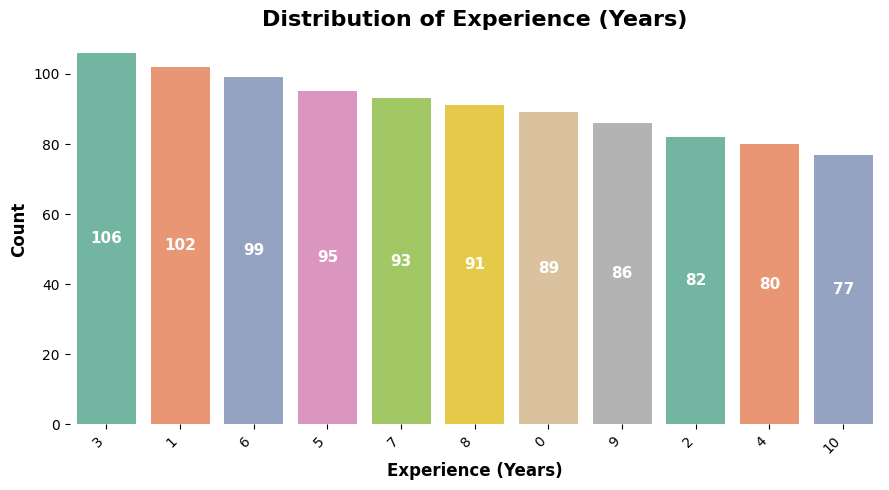

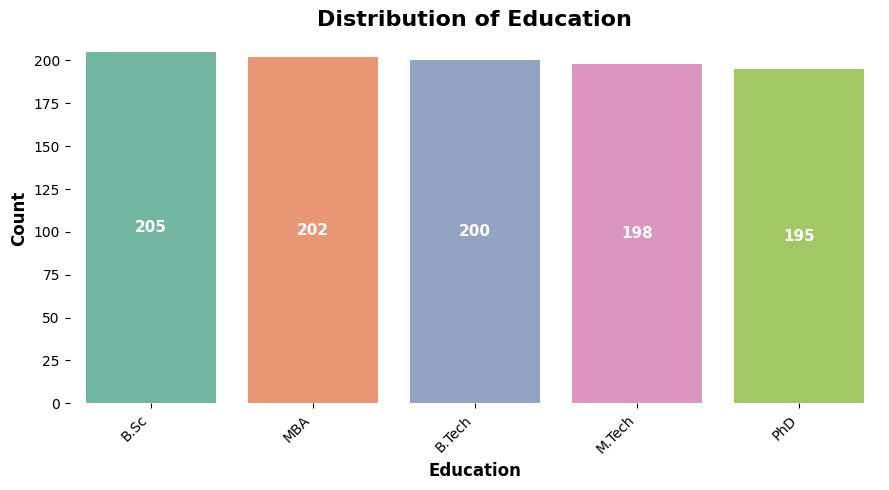

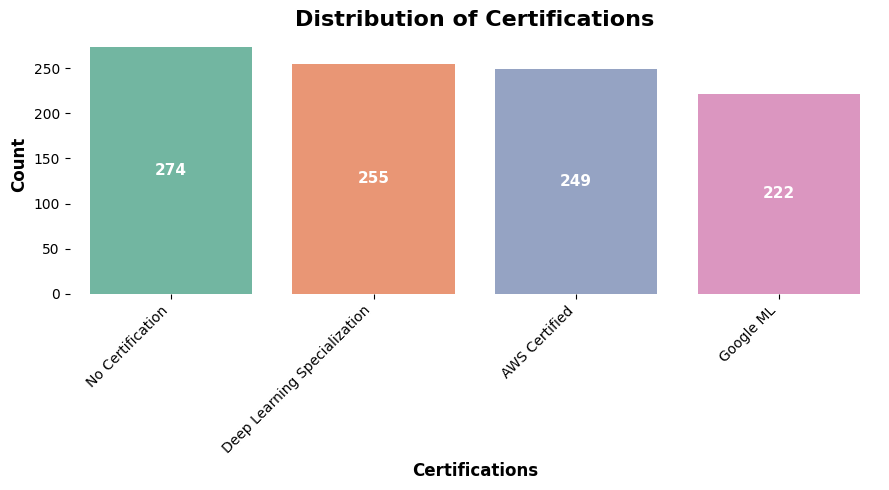

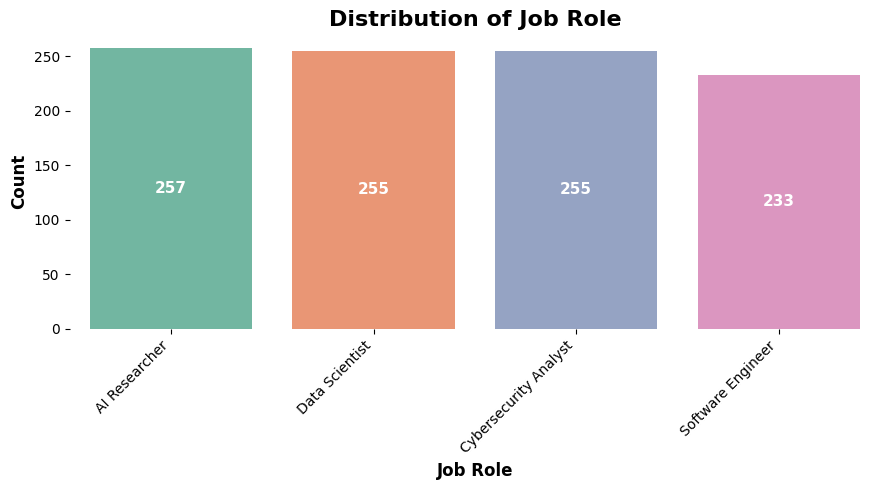

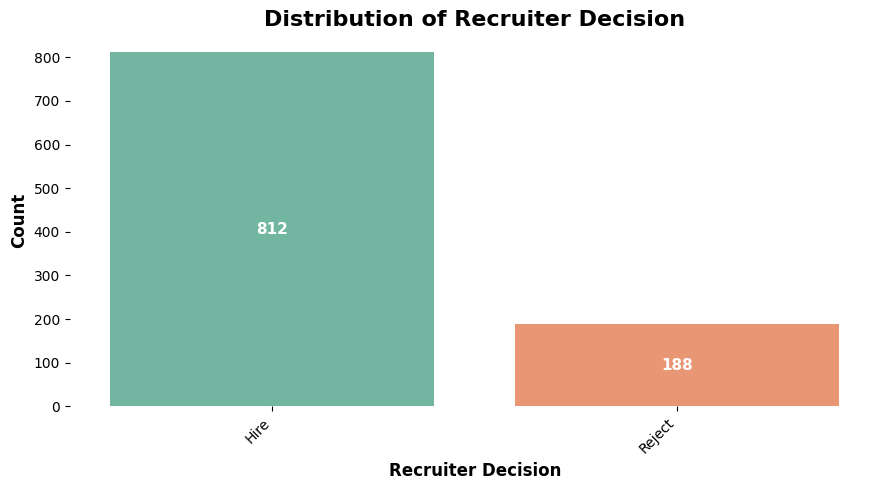

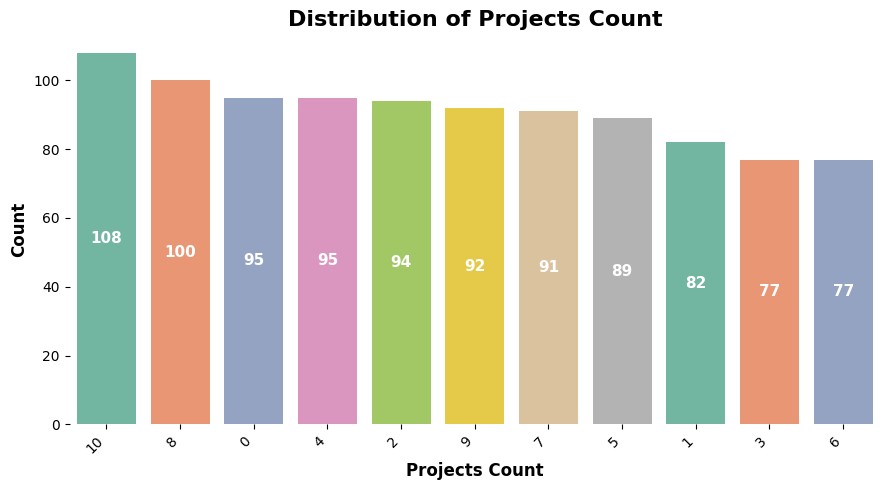

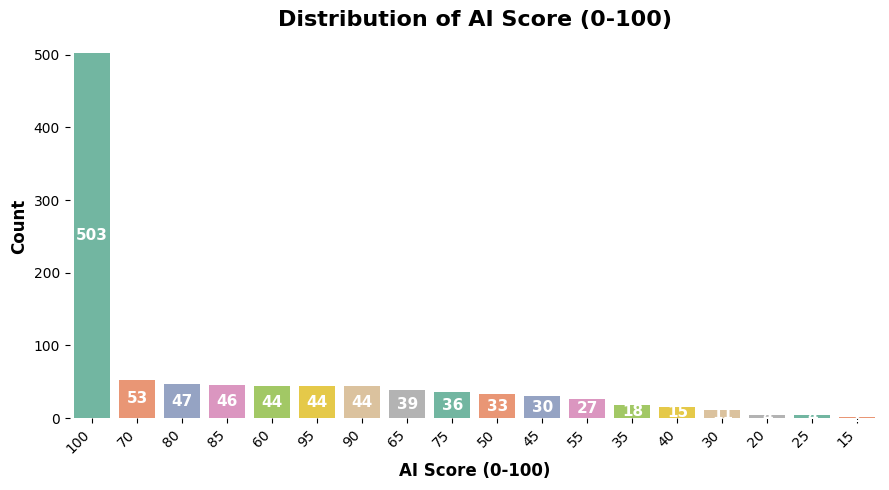

In [9]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


columns = ['Experience (Years)', 'Education', 'Certifications', 
           'Job Role', 'Recruiter Decision', 'Projects Count', 'AI Score (0-100)']

# Plotting loop
for col in columns:
    plt.figure(figsize=(9,5))
    ax = sns.countplot(x=col, data=dataset, palette="Set2", order=dataset[col].value_counts().index)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),  # inside bar
                    ha='center', va='center', 
                    color='white', fontsize=11, fontweight='bold')

    # Titles & labels
    plt.title(f'Distribution of {col}', fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    
    # Style
    sns.despine(left=True, bottom=True)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.show()


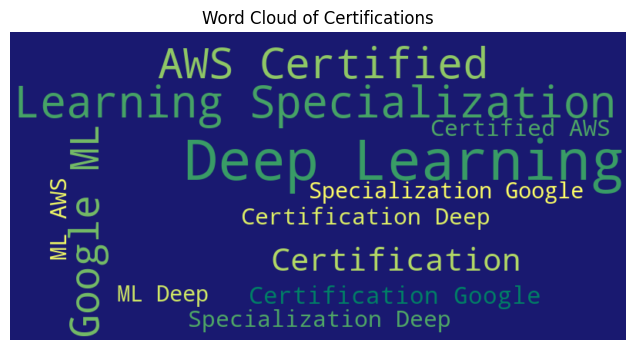

In [10]:
text = " ".join(skill for skill in dataset['Certifications'].astype(str))
wordcloud = WordCloud(background_color='midnightblue', colormap='summer', max_words=100, width=800, height=400).generate(text)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Certifications')
plt.show()

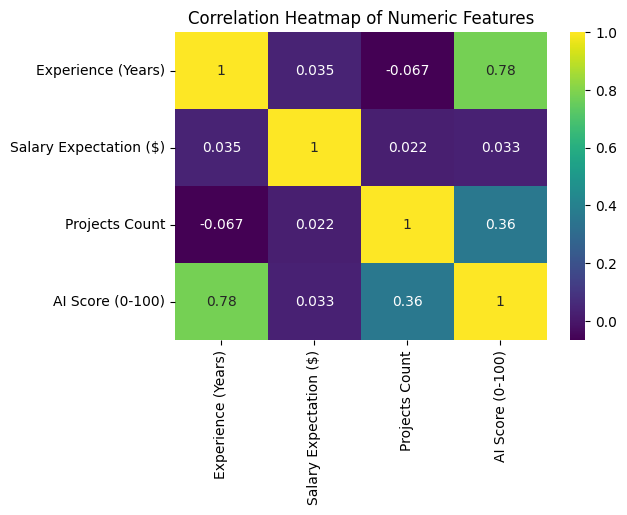

In [11]:
numeric_cols = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']
plt.figure(figsize=(6,4))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


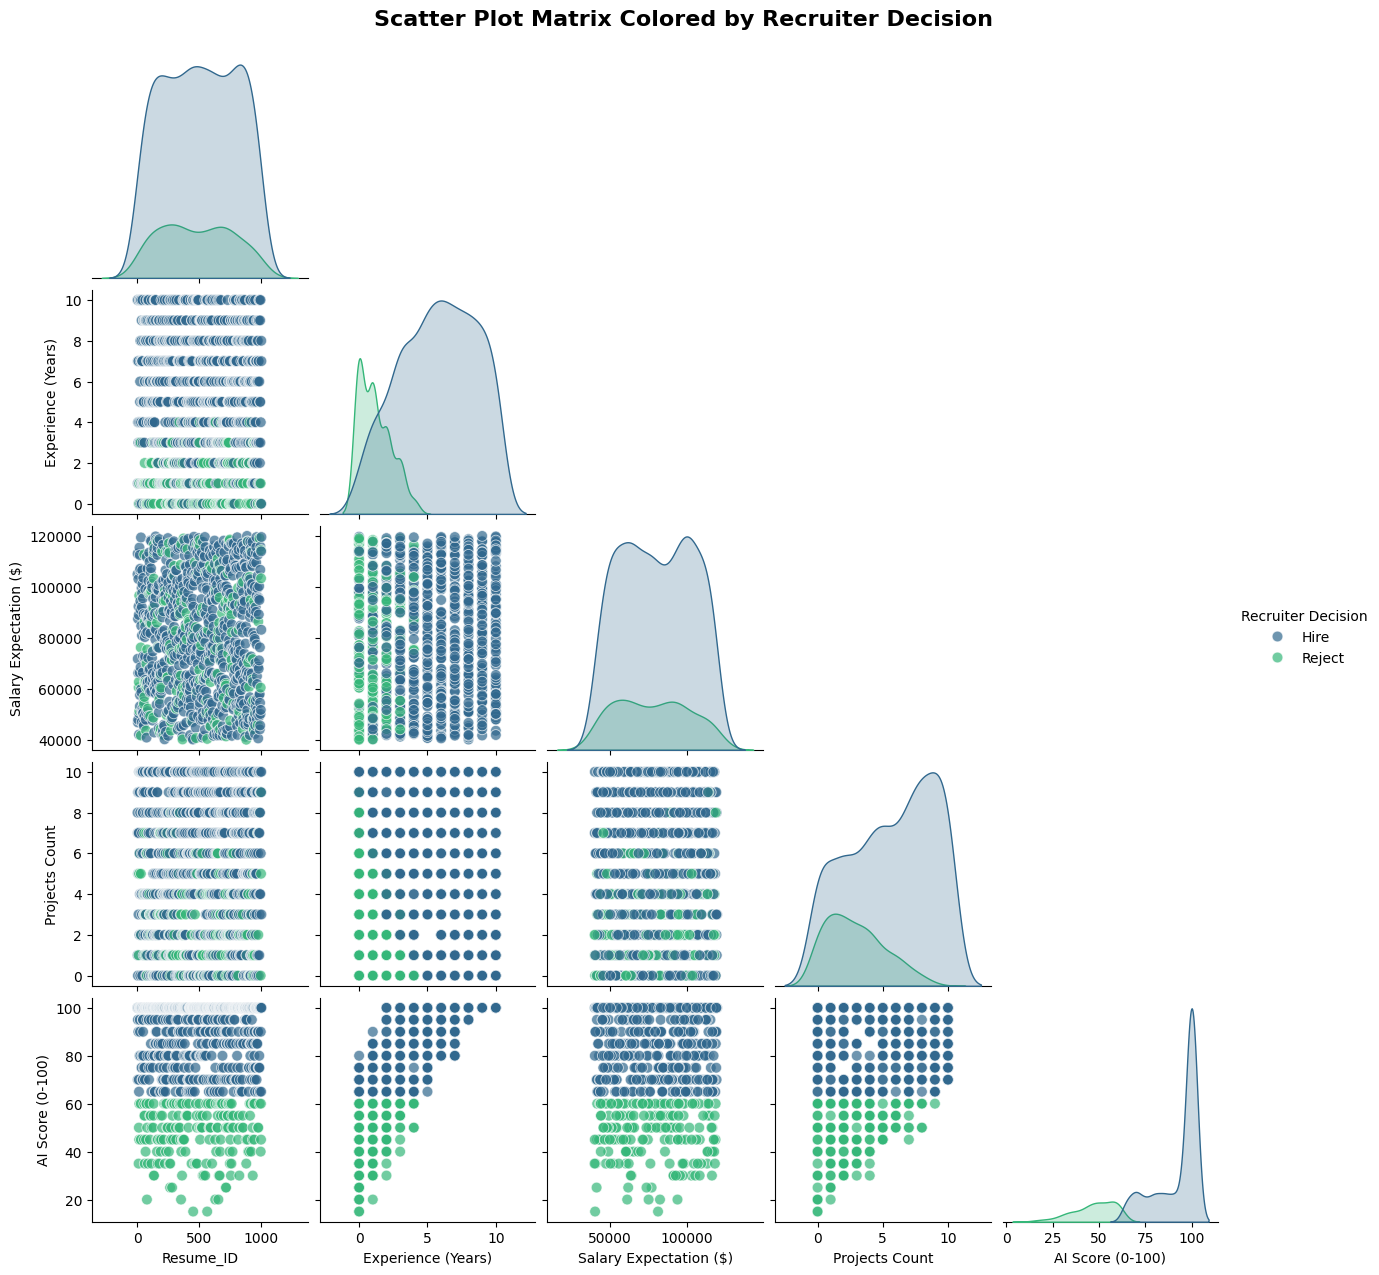

In [12]:
import warnings
warnings.filterwarnings('ignore')

# Numeric columns
numeric_cols = dataset.select_dtypes(include=['number']).columns

# Correct target column name
target_col = 'Recruiter Decision'  # exact name after strip

# Pairplot
sns.pairplot(dataset[list(numeric_cols) + [target_col]],
             hue=target_col,
             diag_kind='kde',
             corner=True,
             plot_kws={'alpha':0.7, 's':60, 'edgecolor':'white'},
             palette='viridis')

plt.suptitle('Scatter Plot Matrix Colored by Recruiter Decision', fontsize=16, fontweight='bold', y=1.02)
plt.show()


In [13]:
dataset["Recruiter Decision"].value_counts()

Recruiter Decision
Hire      812
Reject    188
Name: count, dtype: int64

In [14]:
numeric_cols = ['Experience (Years)', 'Projects Count', 'AI Score (0-100)', 'Salary Expectation ($)']
x_numeric = pd.DataFrame(StandardScaler().fit_transform(dataset[numeric_cols]), columns=numeric_cols)

text_cols = ['Skills', 'Education', 'Certifications', 'Job Role']
x_text_combined = dataset[text_cols].astype(str).agg(' '.join, axis=1)


le = LabelEncoder()
y = le.fit_transform(dataset['Recruiter Decision'])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x_text_combined, y, test_size=0.2, random_state=42
)

In [16]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [17]:
x_train_num = x_numeric.loc[x_train.index].values
x_test_num = x_numeric.loc[x_test.index].values


In [18]:
x_train_final = hstack([x_train_vec, x_train_num])
x_test_final = hstack([x_test_vec, x_test_num])

In [19]:
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(x_train_final, y_train)
y_pred = rf_model.predict(x_test_final)

acc = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {acc:.2f}")
print(classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


Random Forest Accuracy: 1.00
              precision    recall  f1-score   support

        Hire       1.00      1.00      1.00       154
      Reject       1.00      1.00      1.00        46

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [20]:
import joblib
joblib.dump(rf_model, "rf_model2.pkl")
joblib.dump(vectorizer, "vectorizer2.pkl")
joblib.dump(le, "label_encoder2.pkl")
joblib.dump(StandardScaler().fit(dataset[numeric_cols]), "scaler2.pkl")

print("🎯 Model, vectorizer, encoder, and scaler saved successfully!")

🎯 Model, vectorizer, encoder, and scaler saved successfully!
